

```
Time Series
```



#Load the lib
#load the data
#eda
#DECmpose
#ACF
#PACF
#AUTO_ARIMA
#MAKE A MODEL==>ARIMA+SARMIA



In [1]:
import pandas as pd #manipulation
import numpy as np #numerical python
import matplotlib.pyplot as plt #visual
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose #visual representation of seasonal decompose
from statsmodels.tsa.stattools import acf,pacf #ploting acf and pacf graph
from statsmodels.tsa.arima_model import ARIMA  # modeling

In [3]:
#load the data
data=pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.tail()


,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [58]:
12*12

144

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [60]:
data['Month']=pd.to_datetime(data['Month']) #converting month column str to date time
data.index=data['Month']  #making month column as index column

In [61]:
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [62]:
del data['Month']

In [63]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

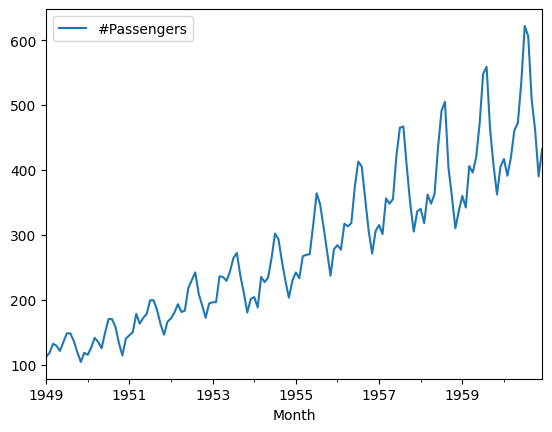

In [64]:
data.plot()

Text(0.5, 1.0, 'Rolling Mean & statandard deviation')

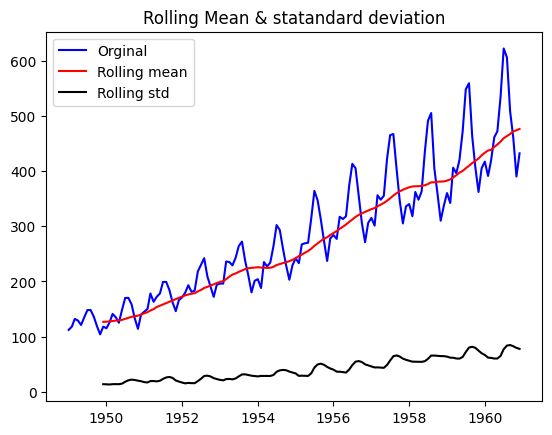

In [65]:
mean_log=data.rolling(window=12).mean()
std_log=data.rolling(window=12).std()

plt.plot(data,color='blue',label='Orginal')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & statandard deviation')

In [66]:
#checking the stationarity
from statsmodels.tsa.stattools import adfuller

In [67]:
result=adfuller(data['#Passengers'])
result

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [68]:
p_value=result[1]
p_value

0.991880243437641

In [69]:
#refrence purpose
if p_value <=0.05:
  print('Stationarity is present')
else:
  print('No stattionarity is present')

No stattionarity is present


<Axes: xlabel='Month'>

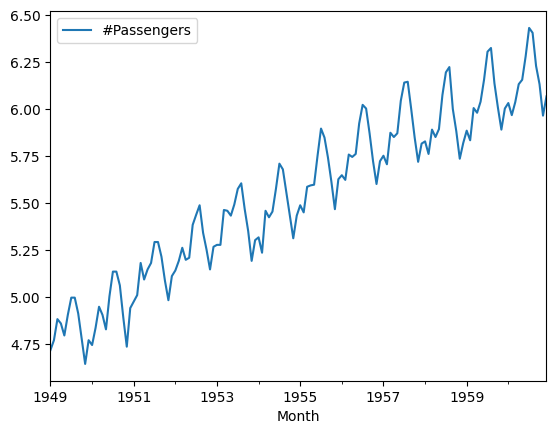

In [70]:
first_log=np.log(data)
first_log=first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & statandard deviation')

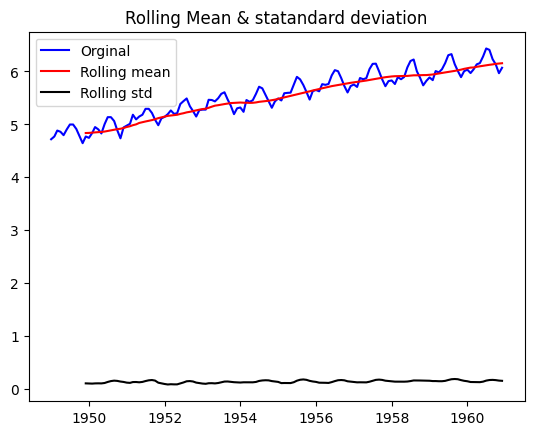

In [71]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

plt.plot(first_log,color='blue',label='Orginal')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & statandard deviation')

In [72]:
result=adfuller(first_log['#Passengers'])
result

(-1.7170170891069683,
 0.4223667747703874,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

In [73]:
new_data=first_log - mean_log

In [74]:
new_data

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [75]:
new_data=new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [54]:
result=adfuller(new_data['#Passengers'])
result

(-3.1629079913008833,
 0.022234630001242206,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747034)

Text(0.5, 1.0, 'Rolling Mean & statandard deviation')

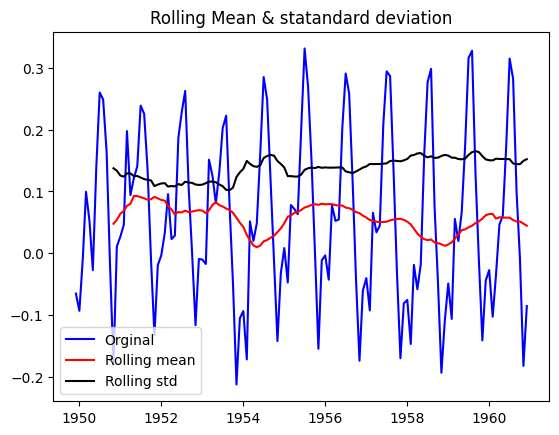

In [76]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Orginal')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & statandard deviation')

In [77]:
#seasonal decompose
old_decompose_result=seasonal_decompose(data['#Passengers'].dropna())

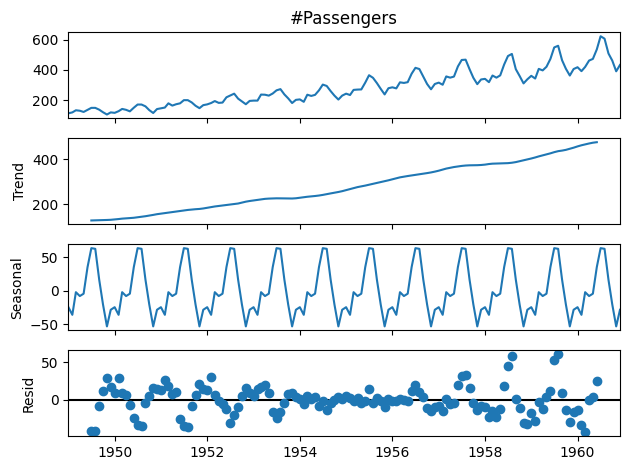

In [80]:
old_decompose_result.plot();

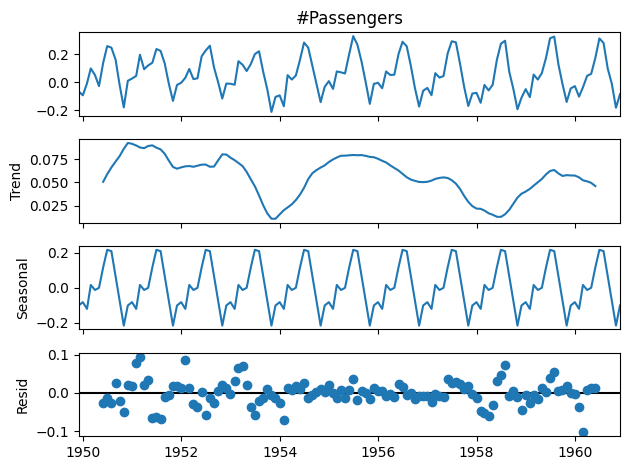

In [82]:
decompose_result=seasonal_decompose(new_data['#Passengers'].dropna())
decompose_result.plot();

In [84]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [86]:
from pmdarima import auto_arima

In [87]:
arima_model=auto_arima(data['#Passengers'],seaonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [90]:
arima_model=auto_arima(new_data['#Passengers'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-277.439, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-152.169, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-233.989, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-246.526, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-133.698, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-252.154, Time=0.99 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-279.238, Time=0.53 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-254.090, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-260.142, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-277.308, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-261.472, Time=0.52 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-285.263, Time=1.62 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-283.078, Time=0.83 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-267.800, Time=1.00 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept

In [91]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

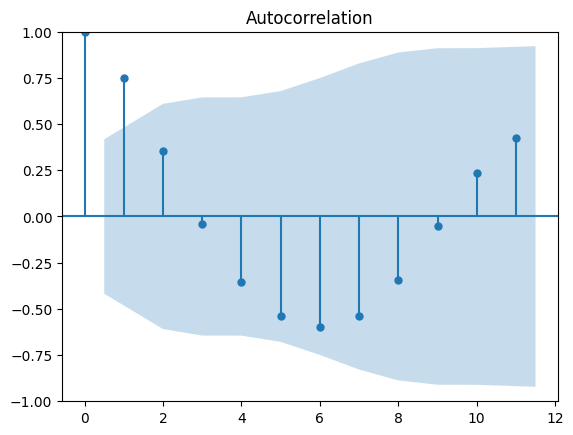

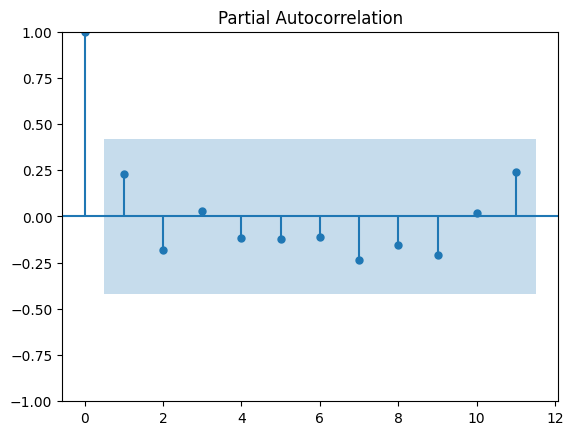

In [95]:
acf_plot=acf(new_data)
pacf_plot=pacf(new_data)
plot_acf(acf_plot);
plot_pacf(pacf_plot);

In [99]:
from statsmodels.tsa.arima.model import ARIMA
train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']
model = ARIMA(train, order=(3,0,2))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 134.726
Date:                Sun, 03 Mar 2024   AIC                           -255.453
Time:                        17:04:00   BIC                           -235.940
Sample:                    12-01-1949   HQIC                          -247.529
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.006      8.958      0.000       0.044       0.069
ar.L1          0.7851      0.151      5.199      0.000       0.489       1.081
ar.L2          0.2854      0.186      1.531      0.126      -0.080       0.651
ar.L3         -0.5319      0.120     -4.440      0.000      -0.767      -0.297
ma.L1          0.1278      0.122      1.043      0.297      -0.112       0.368
ma.L2         -0.7497      0.093     -8.051      0.000      -0.932      -0.567
sigma2         0.0061      0.001      5.414      0.000       0.004       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 3.85
Prob(Q):                              0.53   Prob(JB):                         0.15
Heteroskedasticity (H):               0.98   Skew:                             0.11
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<ipython-input-100-c8eeccd72c3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)


<Axes: xlabel='Month'>

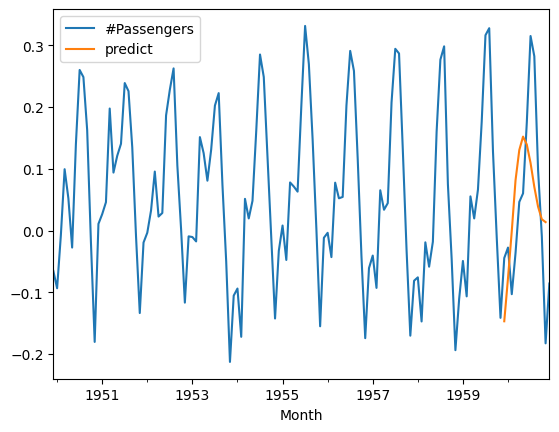

In [100]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

In [101]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [102]:
model=SARIMAX(train,order=(3,0,2),seasonal_order=(3,0,2,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary star

<ipython-input-103-a0cf15e48c52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)


<Axes: xlabel='Month'>

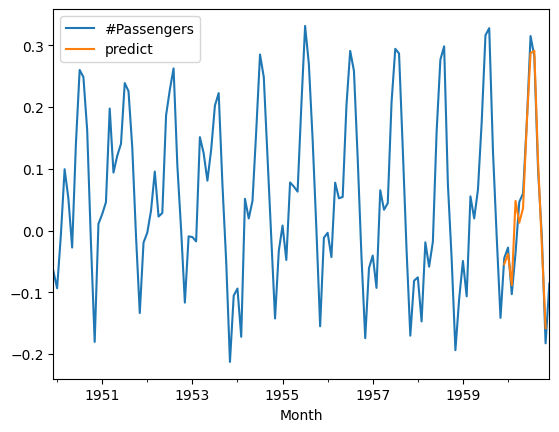

In [103]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

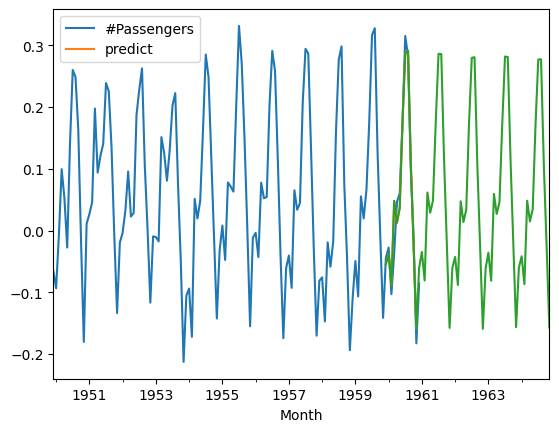

In [106]:
forecast=model.forecast(steps=60)
new_data.plot()
forecast.plot()